In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

import missingno as msno

In [2]:
# Set up folder with data:
os.chdir('D:\\00_PROJECTS_sripts_code\\loT_intrusion_detection')

In [3]:
#%% Function to extract code from GitHub:
def GetGitHubCode(GitUrl):

    response = requests.get(GitUrl) #get data from json file located at specified URL 

    if response.status_code == requests.codes.ok:
        contentOfUrl = response.content
        exec(contentOfUrl, globals() )
    else:
        print('Content was not found.')

In [4]:
###################
#%% Read data
###################

In [5]:
IoT_Intrusion_data = pd.read_csv('IoT_Intrusion.csv')

In [6]:
##########################################################
##########################################################
#%% Brief check data
##########################################################
##########################################################

In [7]:
IoT_Intrusion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [8]:
IoT_Intrusion_data.describe().T

,count,mean,std,min,25%,50%,75%,max
flow_duration,1048575.0,5.763553e+00,2.965660e+02,0.000000,0.000000e+00,0.000000e+00,1.042881e-01,9.943576e+04
Header_Length,1048575.0,7.759537e+04,4.664043e+05,0.000000,5.400000e+01,5.400000e+01,2.781200e+02,9.815555e+06
Protocol Type,1048575.0,9.062979e+00,8.936737e+00,0.000000,6.000000e+00,6.000000e+00,1.428000e+01,4.700000e+01
Duration,1048575.0,6.635523e+01,1.408680e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,1048575.0,9.146945e+03,9.974794e+04,0.000000,2.087155e+00,1.581371e+01,1.174380e+02,7.340032e+06
Srate,1048575.0,9.146945e+03,9.974794e+04,0.000000,2.087155e+00,1.581371e+01,1.174380e+02,7.340032e+06
Drate,1048575.0,1.807621e-06,8.501385e-04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.484654e-01
fin_flag_number,1048575.0,8.655842e-02,2.811870e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,1048575.0,2.073090e-01,4.053790e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,1048575.0,9.057149e-02,2.869989e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
# columns below have only one value, so they don't give new information, they will be removed
IoT_Intrusion_data[['ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'IRC' ]].describe()

,ece_flag_number,cwr_flag_number,Telnet,SMTP,IRC
count,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [10]:
IoT_Intrusion_data.drop(['ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'IRC' ], axis=1, inplace=True)

In [11]:
# chek NA
IoT_Intrusion_data.isna().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
SSH                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [12]:
### Select all numerical and string variables:
numeric_columns = IoT_Intrusion_data.select_dtypes(exclude=['object']).columns
categorical_columns = IoT_Intrusion_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['label'], dtype='object')

In [13]:
### Select 0-1 values columns
indicator_columns_0_1 = IoT_Intrusion_data.apply({0, 1}.issuperset)
numeric_columns_0_1 = IoT_Intrusion_data.columns[indicator_columns_0_1].to_list()
numeric_columns_0_1

['fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'HTTP',
 'HTTPS',
 'DNS',
 'SSH',
 'TCP',
 'UDP',
 'DHCP',
 'ARP',
 'ICMP',
 'IPv',
 'LLC']

In [14]:
numeric_columns_not_0_1 = list(set(numeric_columns) - set(numeric_columns_0_1))

In [15]:
##########################################################
##########################################################
#%% Add additional label columns
##########################################################
##########################################################

In [16]:
# show all label types (attack type, and no attack)
IoT_Intrusion_data['label'].unique()

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [17]:
### add column which indaticate attack or no

In [18]:
IoT_Intrusion_data['attack_indicator'] = np.where(IoT_Intrusion_data['label'] == 'BenignTraffic', '0', '1')

In [19]:
### add column which indaticate main attack or no

In [20]:
# ^DoS with sign '^' to distingusigh between DDoS at the begining
mapping_cathegory = {
     'Benign':['Benign']
    ,'BruteForce':['BruteForce']
    ,'DDoS':['DDoS']    
    ,'DoS':['^DoS']    
    ,'Mirai':['Mirai']
    ,'Recon':['VulnerabilityScan', 'Recon']
    ,'Spoofing':['Spoofing']
    ,'Web':['CommandInjection', 'Backdoor_Malware', 'BrowserHijacking', 'SqlInjection', 'Uploading_Attack', 'XSS']
}

In [21]:
for main_type, substring in mapping_cathegory.items():
     IoT_Intrusion_data.loc[IoT_Intrusion_data['label'].str.contains('|'.join(substring)), 'attact_type_main'] = main_type 

In [22]:
# show all uniqe values
IoT_Intrusion_data['attact_type_main'].unique()

array(['DDoS', 'DoS', 'Mirai', 'Benign', 'Spoofing', 'Recon', 'Web',
       'BruteForce'], dtype=object)

In [23]:
# show few rows
IoT_Intrusion_data[['label','attack_indicator', 'attact_type_main']]

,label,attack_indicator,attact_type_main
0,DDoS-RSTFINFlood,1,DDoS
1,DoS-TCP_Flood,1,DoS
2,DDoS-ICMP_Flood,1,DDoS
3,DoS-UDP_Flood,1,DoS
4,DoS-SYN_Flood,1,DoS
...,...,...,...
1048570,DDoS-SynonymousIP_Flood,1,DDoS
1048571,Mirai-greeth_flood,1,Mirai
1048572,DDoS-UDP_Flood,1,DDoS
1048573,DDoS-RSTFINFlood,1,DDoS


In [24]:
##########################################################
##########################################################
#%% Show data distribution
##########################################################
##########################################################

In [25]:
### Show variables disribution 

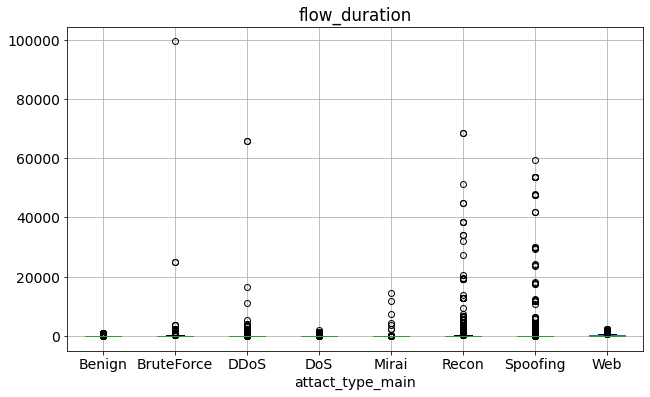

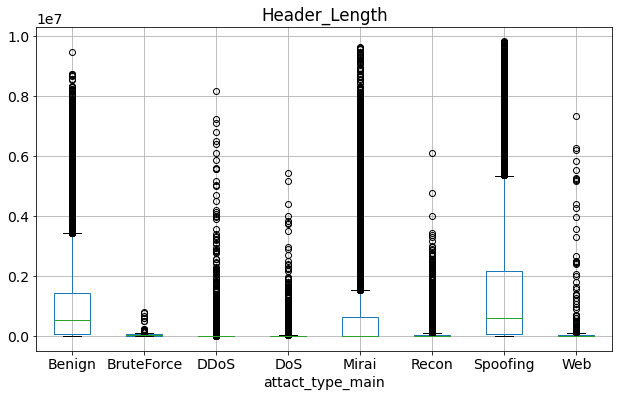

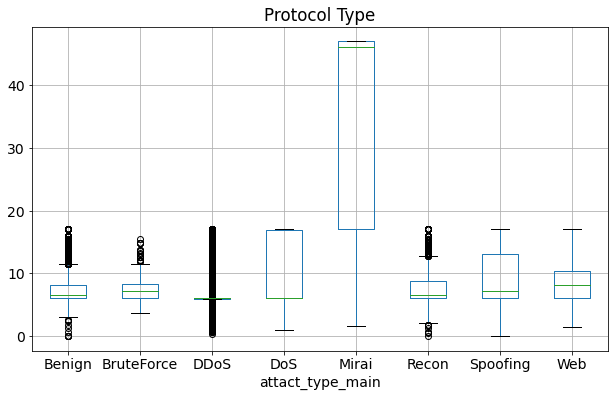

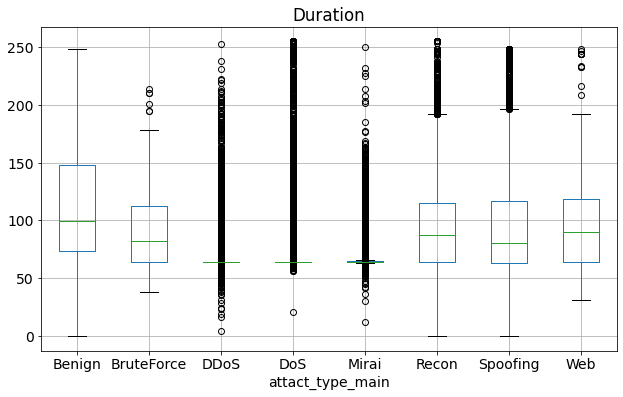

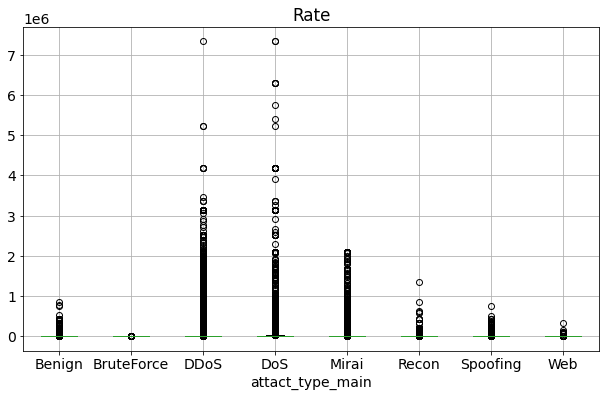

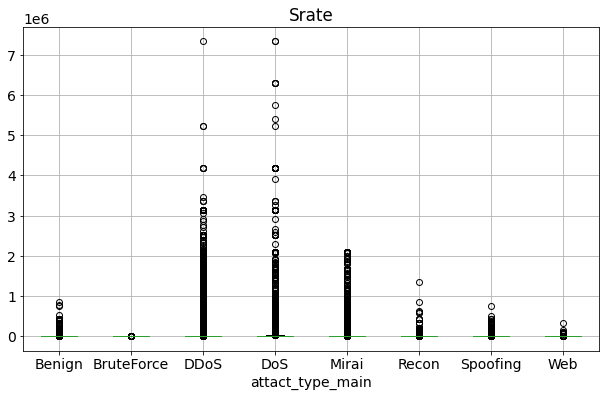

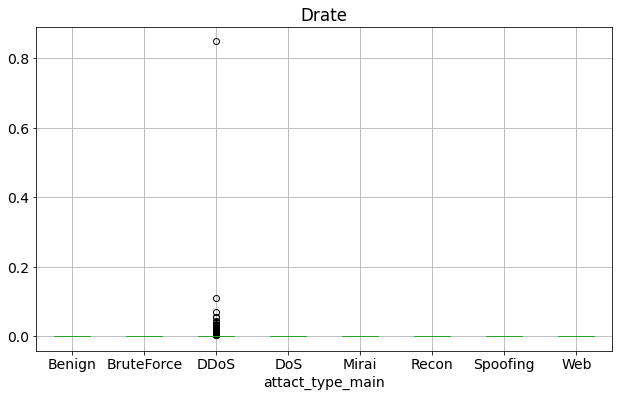

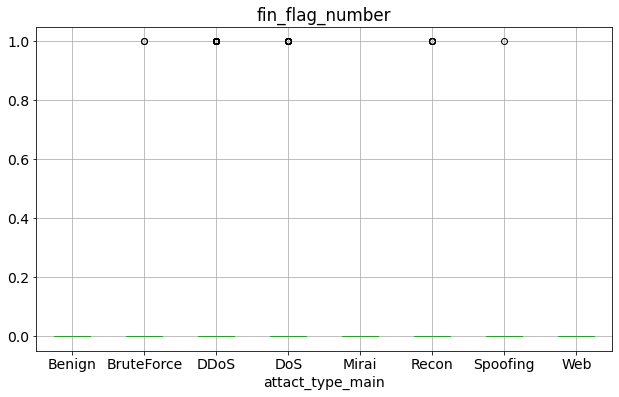

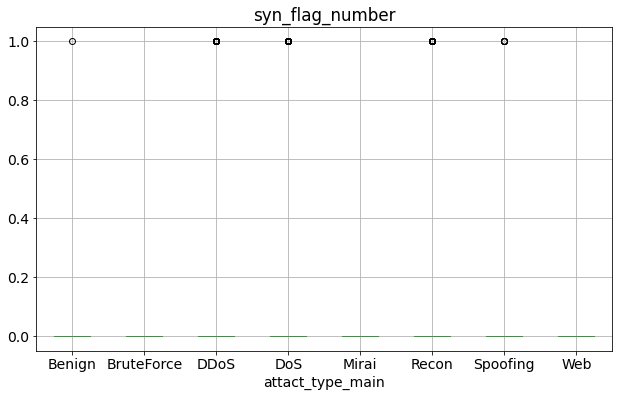

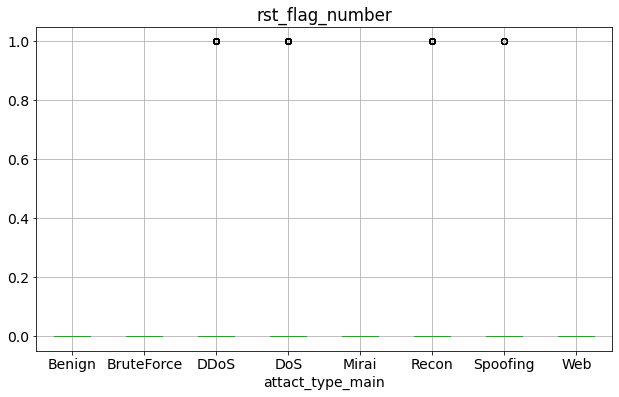

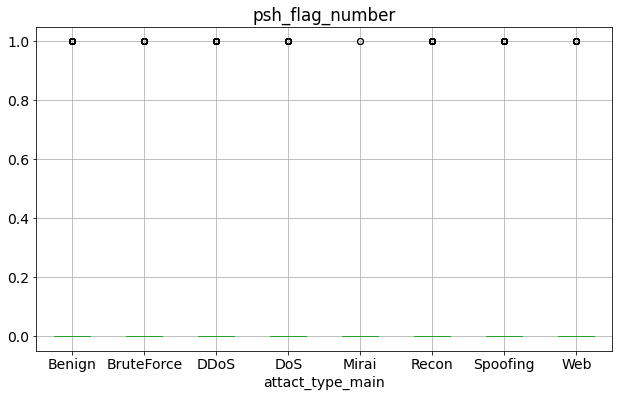

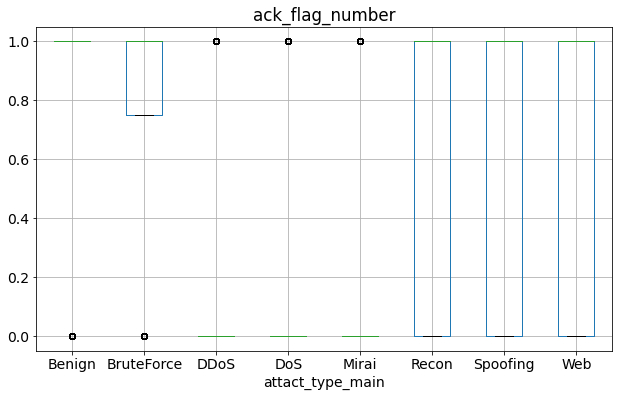

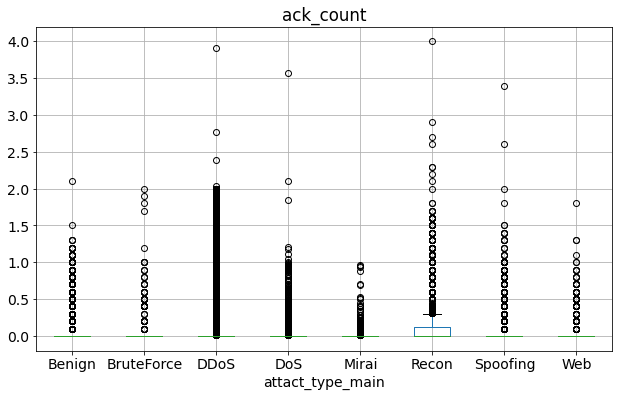

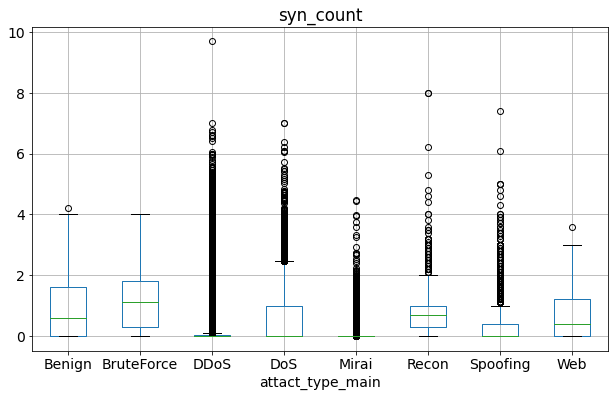

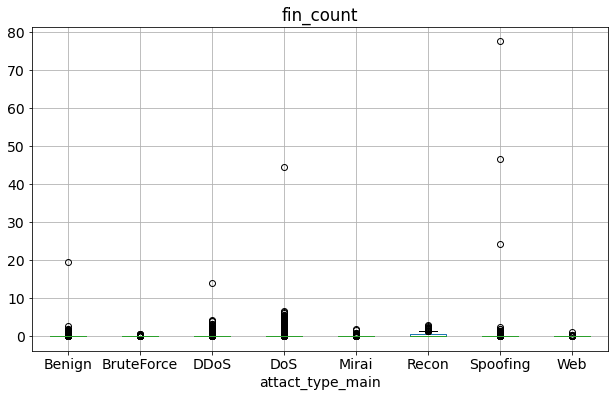

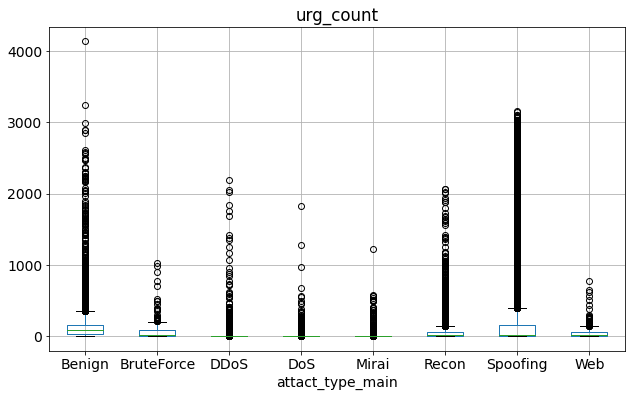

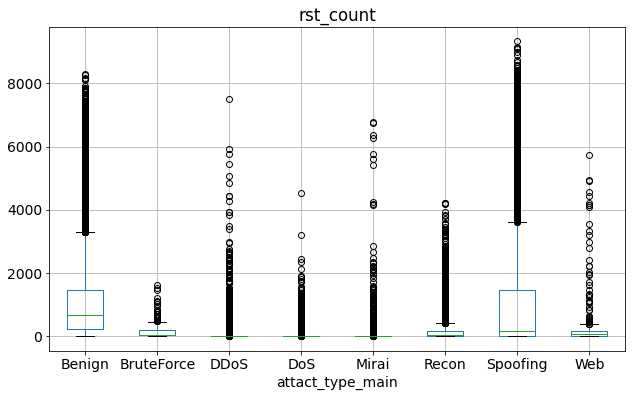

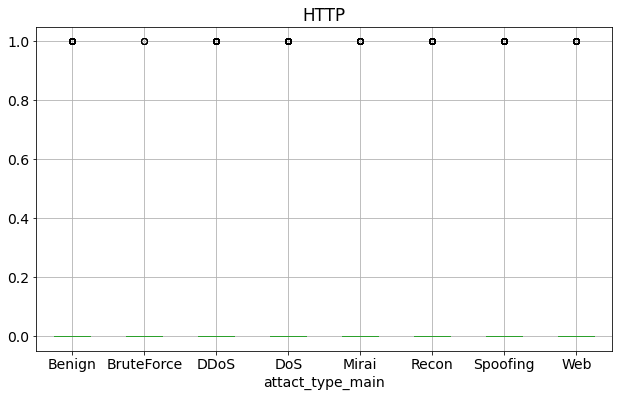

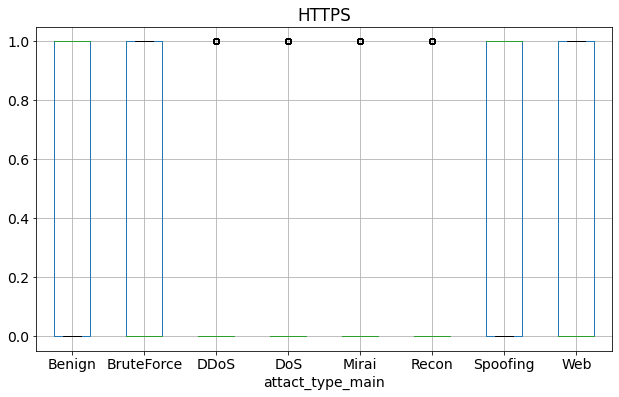

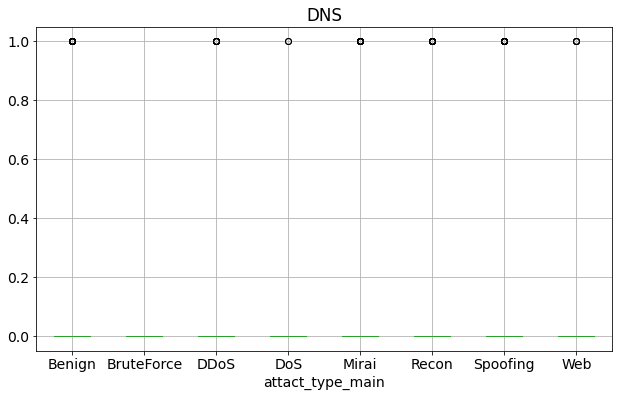

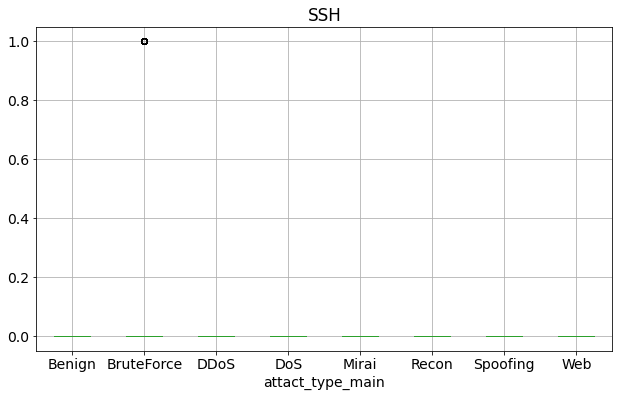

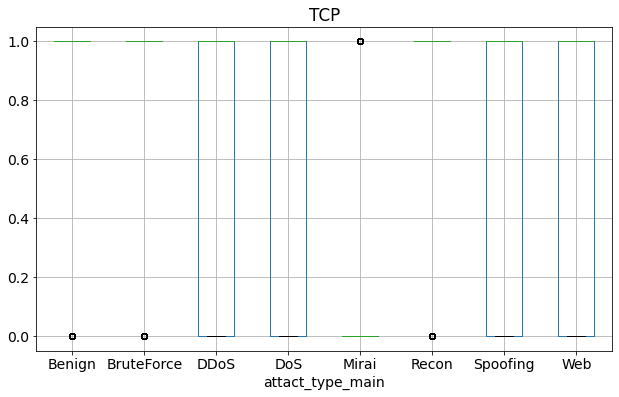

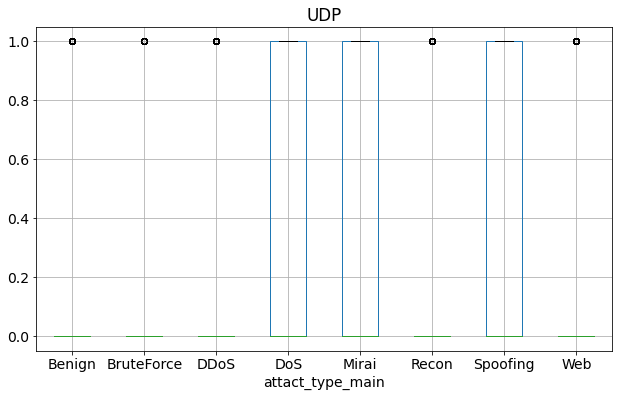

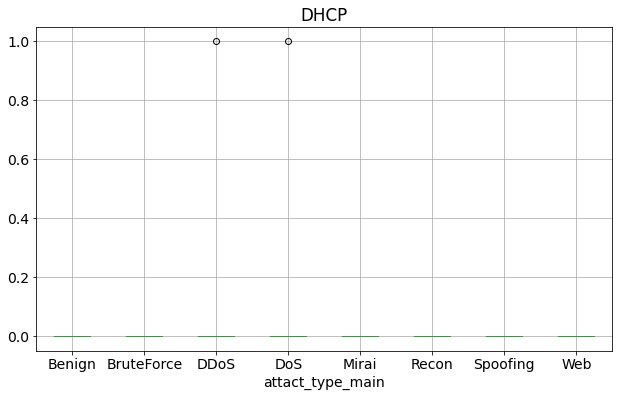

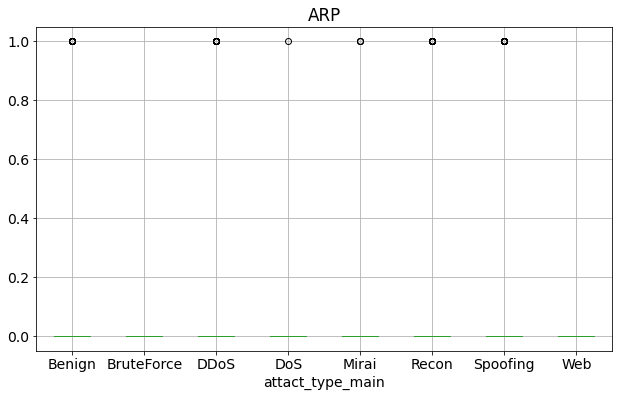

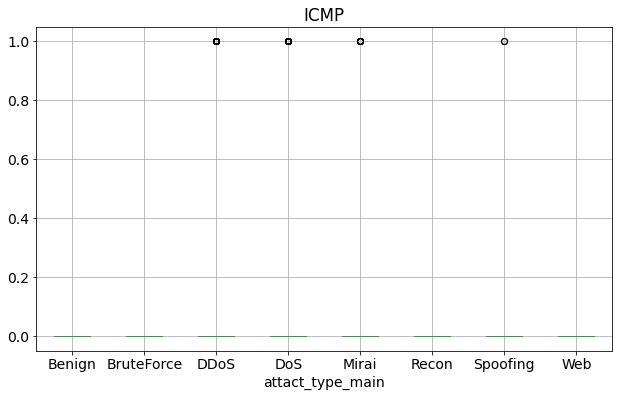

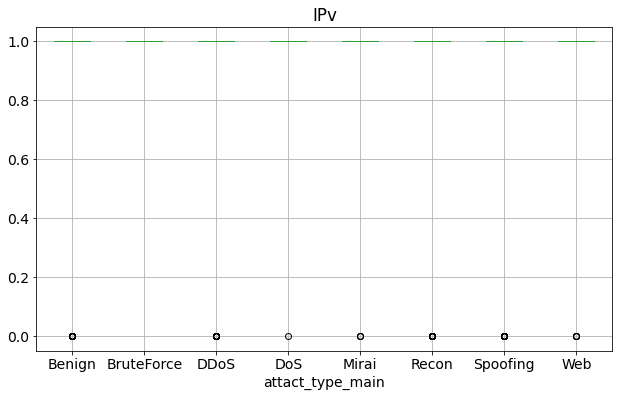

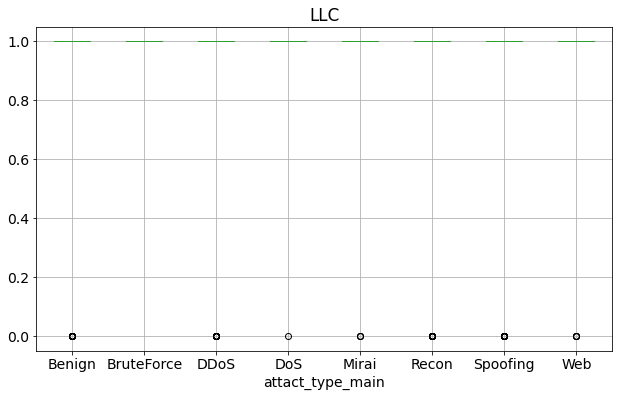

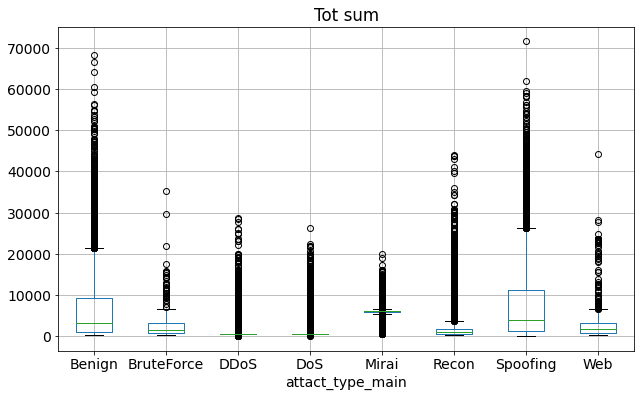

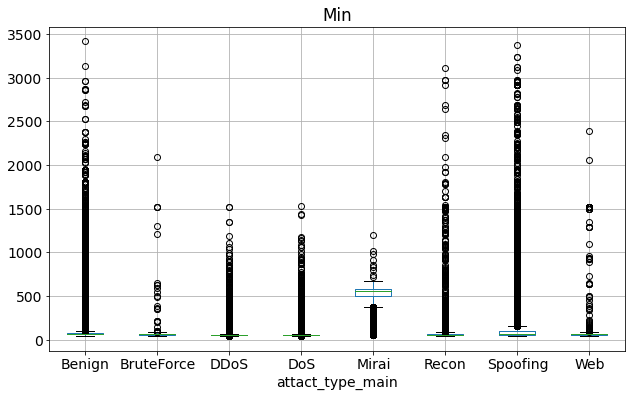

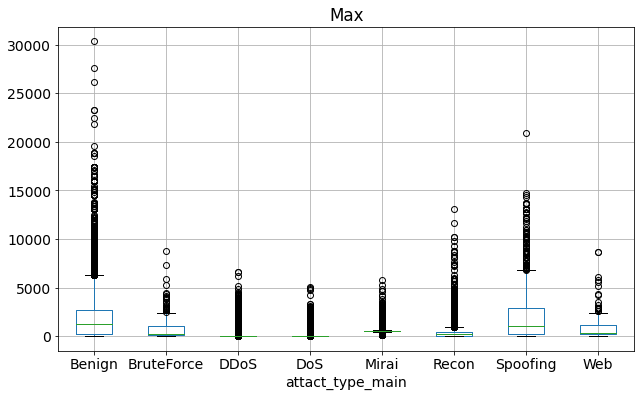

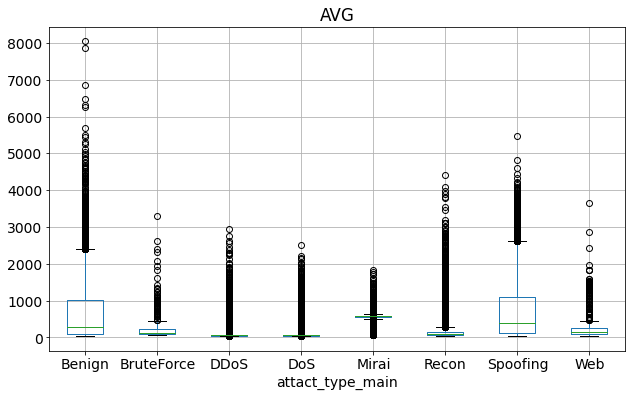

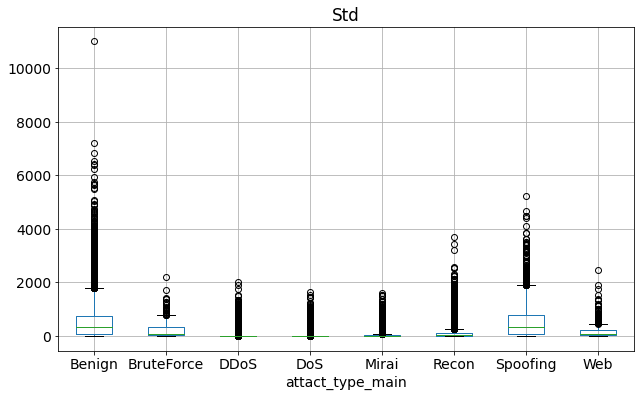

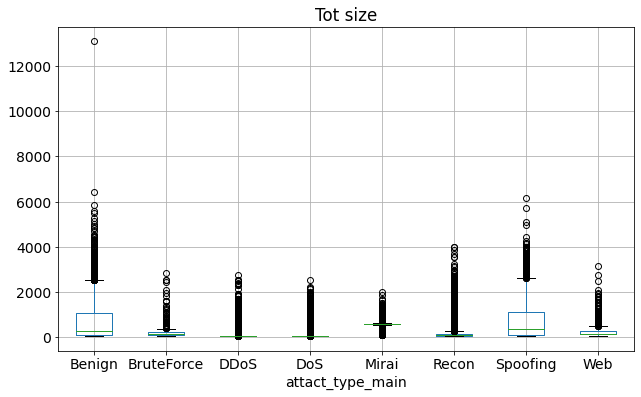

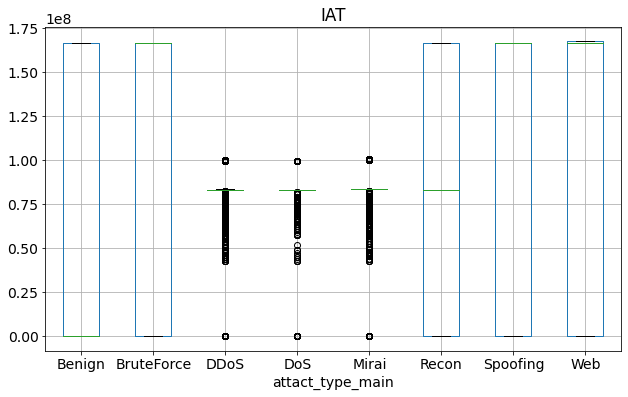

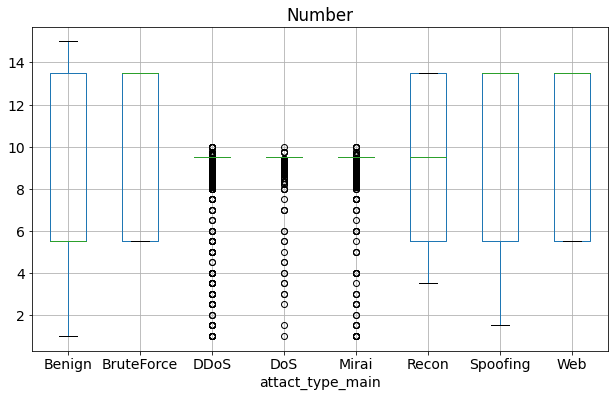

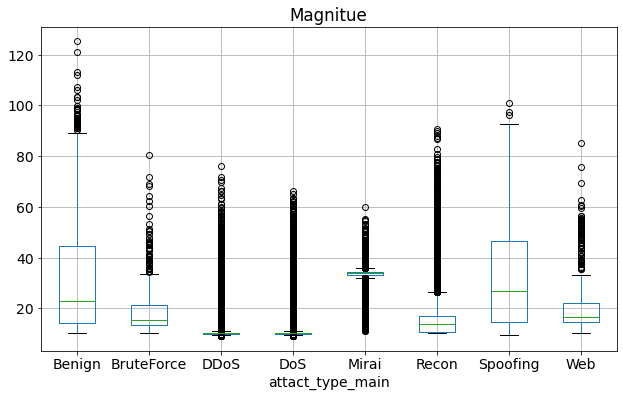

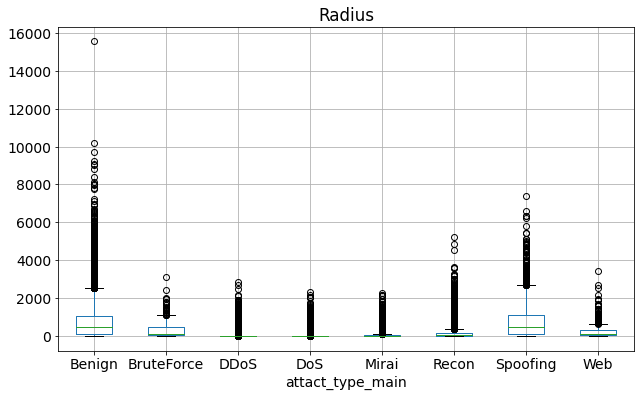

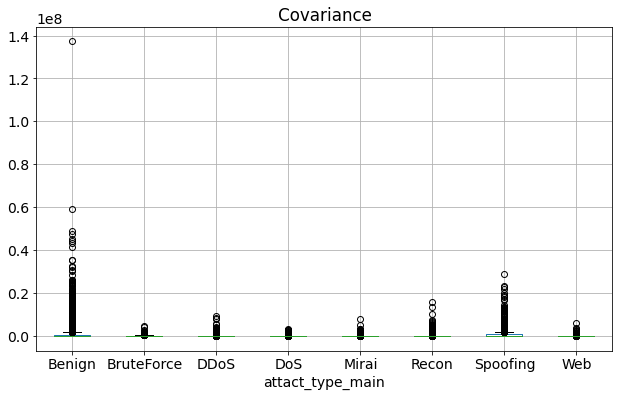

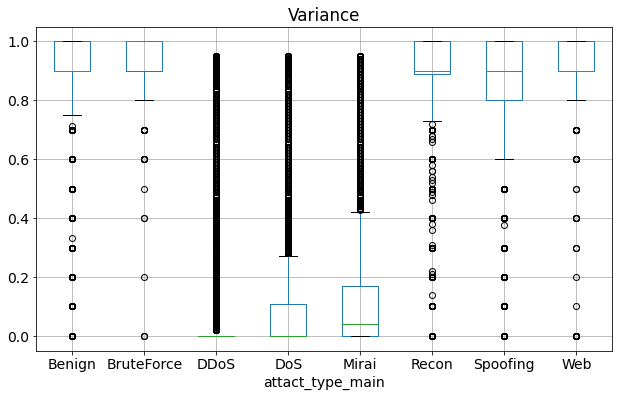

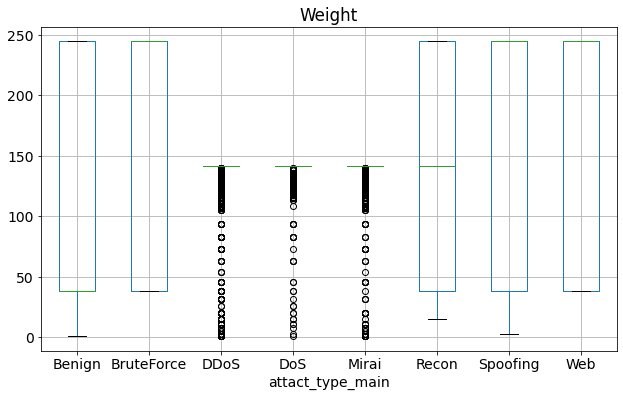

In [26]:
%matplotlib inline
from IPython import display

for column in numeric_columns:
    plt.rcParams.update({'font.size': 14})
    IoT_Intrusion_data.boxplot(column = [column], by = 'attact_type_main', figsize=(10,6))
    plt.title(f'{column}')
    plt.suptitle('')
    plt.show()
    print('')

In [27]:
##########################################################
##########################################################
#%% create analysis data - label encoding depndent column
##########################################################
##########################################################

In [28]:
analysis_data = IoT_Intrusion_data.drop(['label', 'attack_indicator'], axis=1).copy()

In [29]:
analysis_data = IoT_Intrusion_data.copy()

In [30]:
# define label encoder
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 
analysis_data['attact_type_main_num']= label_encoder.fit_transform(analysis_data['attact_type_main']) 

In [31]:
analysis_data[['attact_type_main_num', 'attact_type_main']].drop_duplicates().sort_values('attact_type_main_num')

,attact_type_main_num,attact_type_main
22,0,Benign
5420,1,BruteForce
0,2,DDoS
1,3,DoS
5,4,Mirai
219,5,Recon
26,6,Spoofing
578,7,Web


In [32]:
##########################################################
##########################################################
#%% Correlations
##########################################################
##########################################################

In [33]:
### show correlation for 'attact indicator'

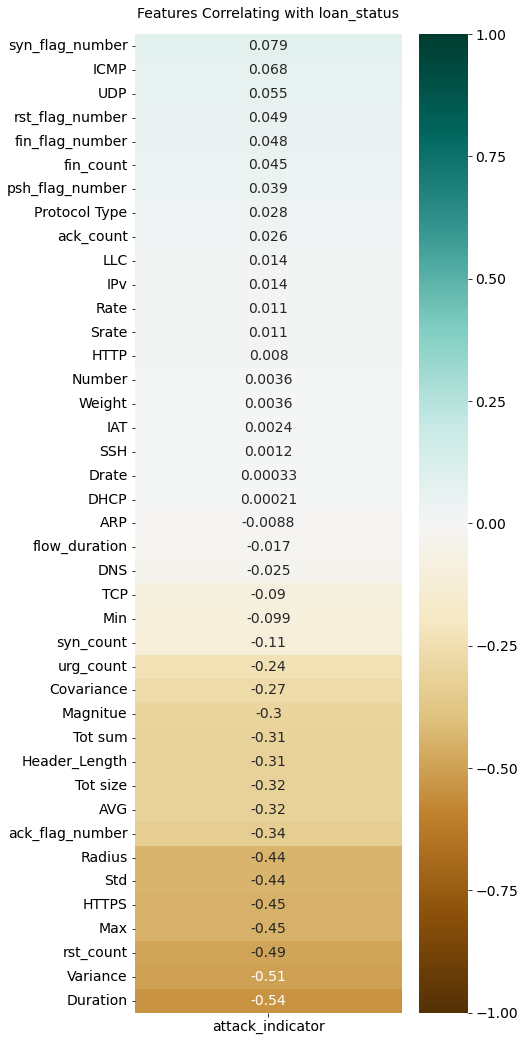

In [34]:
plt.figure(figsize=(6, 18))
y_var_name = 'attack_indicator'
heatmap = sns.heatmap(analysis_data.drop(['attact_type_main','attact_type_main_num','label'], axis=1).corr()[[y_var_name]].sort_values(by=y_var_name, ascending=False).drop(y_var_name)\
                      , vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with loan_status', fontdict={'fontsize':14}, pad=16);

In [35]:
### show correlation for 'attact_type_main_num'

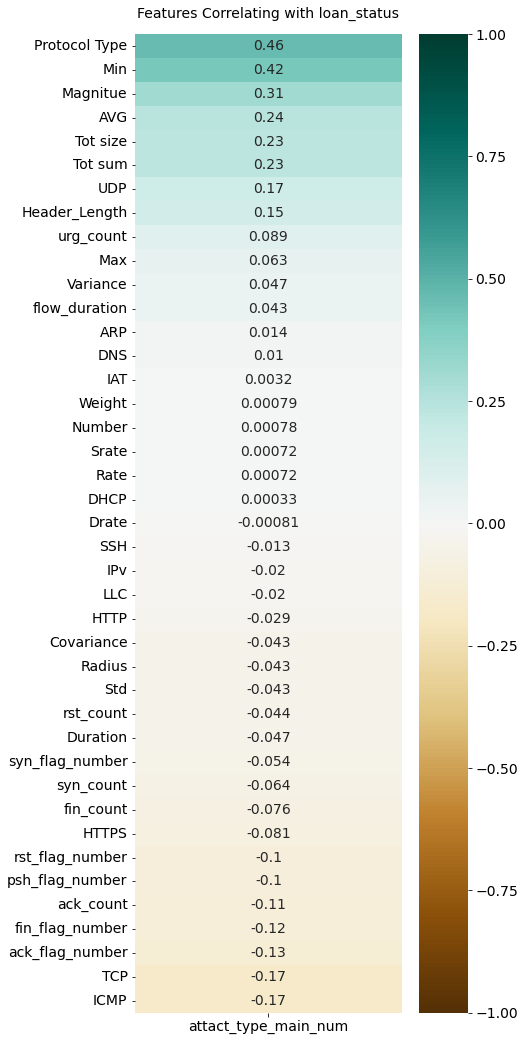

In [36]:
plt.figure(figsize=(6, 18))
y_var_name = 'attact_type_main_num'
heatmap = sns.heatmap(analysis_data.drop(['attact_type_main', 'label', 'attack_indicator'], axis=1).corr()[[y_var_name]].sort_values(by=y_var_name, ascending=False).drop(y_var_name)\
                      , vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with loan_status', fontdict={'fontsize':14}, pad=16);

In [37]:
##########################################################
##########################################################
#%% Show response variable disribution
##########################################################
##########################################################

<AxesSubplot:xlabel='attact_type_main'>

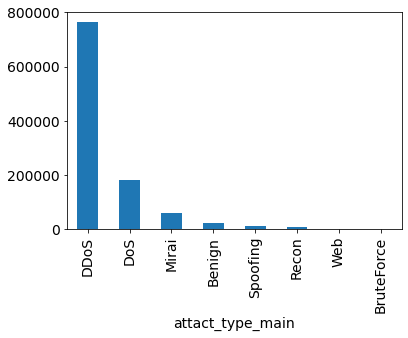

In [38]:
analysis_data['attact_type_main'].value_counts().plot(kind='bar')

In [39]:
##########################################################
##########################################################
#%% Save Prepared Data
##########################################################
##########################################################

In [40]:
### drop labael and attact idnicator columns:

In [41]:
analysis_data.drop(['label', 'attack_indicator'], axis=1, inplace = True)

In [42]:
### save data to csv

In [43]:
analysis_data.to_csv('analysis_data_IoT_Intrusion.csv', index=False)